# Load dataset

In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("alespalla/chatbot_instruction_prompts", split='train')

# subset = dataset.select(range(4000))



In [3]:
docs = dataset['prompt']

# Train Top2Vec model. 

In [4]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-29 13:10:25,514 - top2vec - INFO - Pre-processing documents for training
2024-03-29 13:10:28,979 - top2vec - INFO - Creating joint document/word embedding
2024-03-29 13:45:18,965 - top2vec - INFO - Creating lower dimension embedding of documents
2024-03-29 13:47:22,090 - top2vec - INFO - Finding dense areas of documents
2024-03-29 13:47:32,632 - top2vec - INFO - Finding topics


# Topic Analysis 

In [5]:
model.topic_words[0:3]

array([['hoes', 'shopping', 'anniversary', 'zero', 'birthday', 'resume',
        'employer', 'setup', 'whores', 'surprise', 'salary', 'enhance',
        'draw', 'music', 'song', 'copy', 'sympathy', 'ain', 'bitches',
        'beat', 'actual', 'negotiate', 'party', 'hiring', 'losers',
        'valentine', 'lyrics', 'inspiration', 'launch', 'dear', 'job',
        'genre', 'startup', 'absolutely', 'unfair', 'depressed',
        'beating', 'miss', 'dishwasher', 'network', 'declarative',
        'clause', 'store', 'lease', 'driven', 'hoe', 'sorry', 'lost',
        'requires', 'complain'],
       ['ha', 'super', 'seemed', 'donate', 'soul', 'bowl', 'nails',
        'glass', 'bucket', 'classmates', 'milk', 'feet', 'laughed',
        'stress', 'mate', 'relaxation', 'ran', 'symptoms', 'cancer',
        'supplements', 'toddler', 'crap', 'justice', 'push', 'inches',
        'length', 'charities', 'behave', 'sharing', 'afford', 'nose',
        'stairs', 'cm', 'bake', 'funds', 'criminals', 'arrested'

# Documents similar to keywords

##Pick some keywords that look interesting in the top 3-4 topics:

*   model.topic_words[0]
*   model.topic_words[1]
*   model.topic_words[2]
*   etc.

In [28]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["employer","soul","dragon"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=5)

In [29]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 116923
Similarity Score: 0.471571683883667
Document Content: Complete the story with an appropriate ending. Once upon a time there was a brave knight who set off on a journey to slay a dragon. After many days of travel, he reached the dragon's lair.......
---
Document ID: 30661
Similarity Score: 0.45242857933044434
Document Content: Imagine a plausible alternate ending to this story. The journey had tested them both, but in the end, the knight and the dragon came to an agreement. The knight had saved the dragon's kin and the drag...
---
Document ID: 119047
Similarity Score: 0.39040622115135193
Document Content: Write a story about a prince who wants to save the kingdom from an evil dragon. ...
---
Document ID: 92054
Similarity Score: 0.38584616780281067
Document Content: You need to turn the given story into a poem. John was a brave knight who needed to defend the kingdom from a fierce dragon....
---
Document ID: 180785
Similarity Score: 0.3818092942237854
Document Content

# Topic modeling

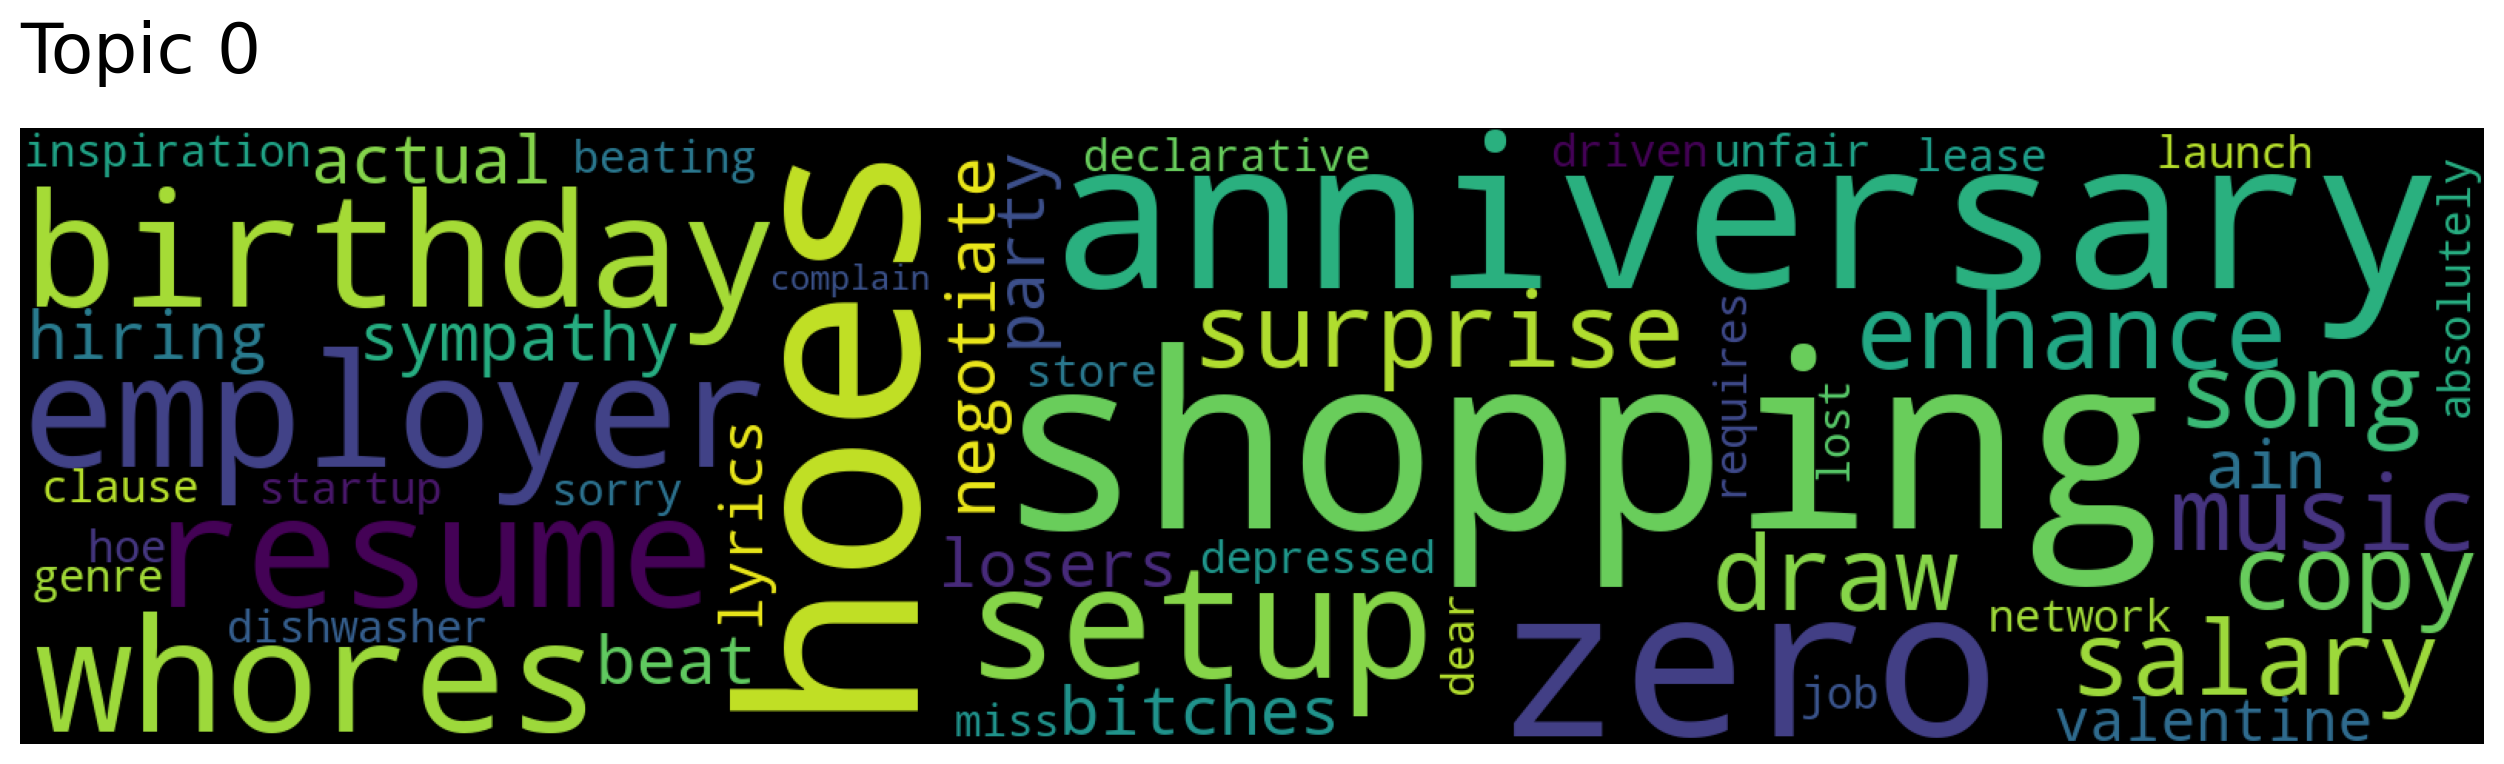

In [41]:
model.generate_topic_wordcloud(0)

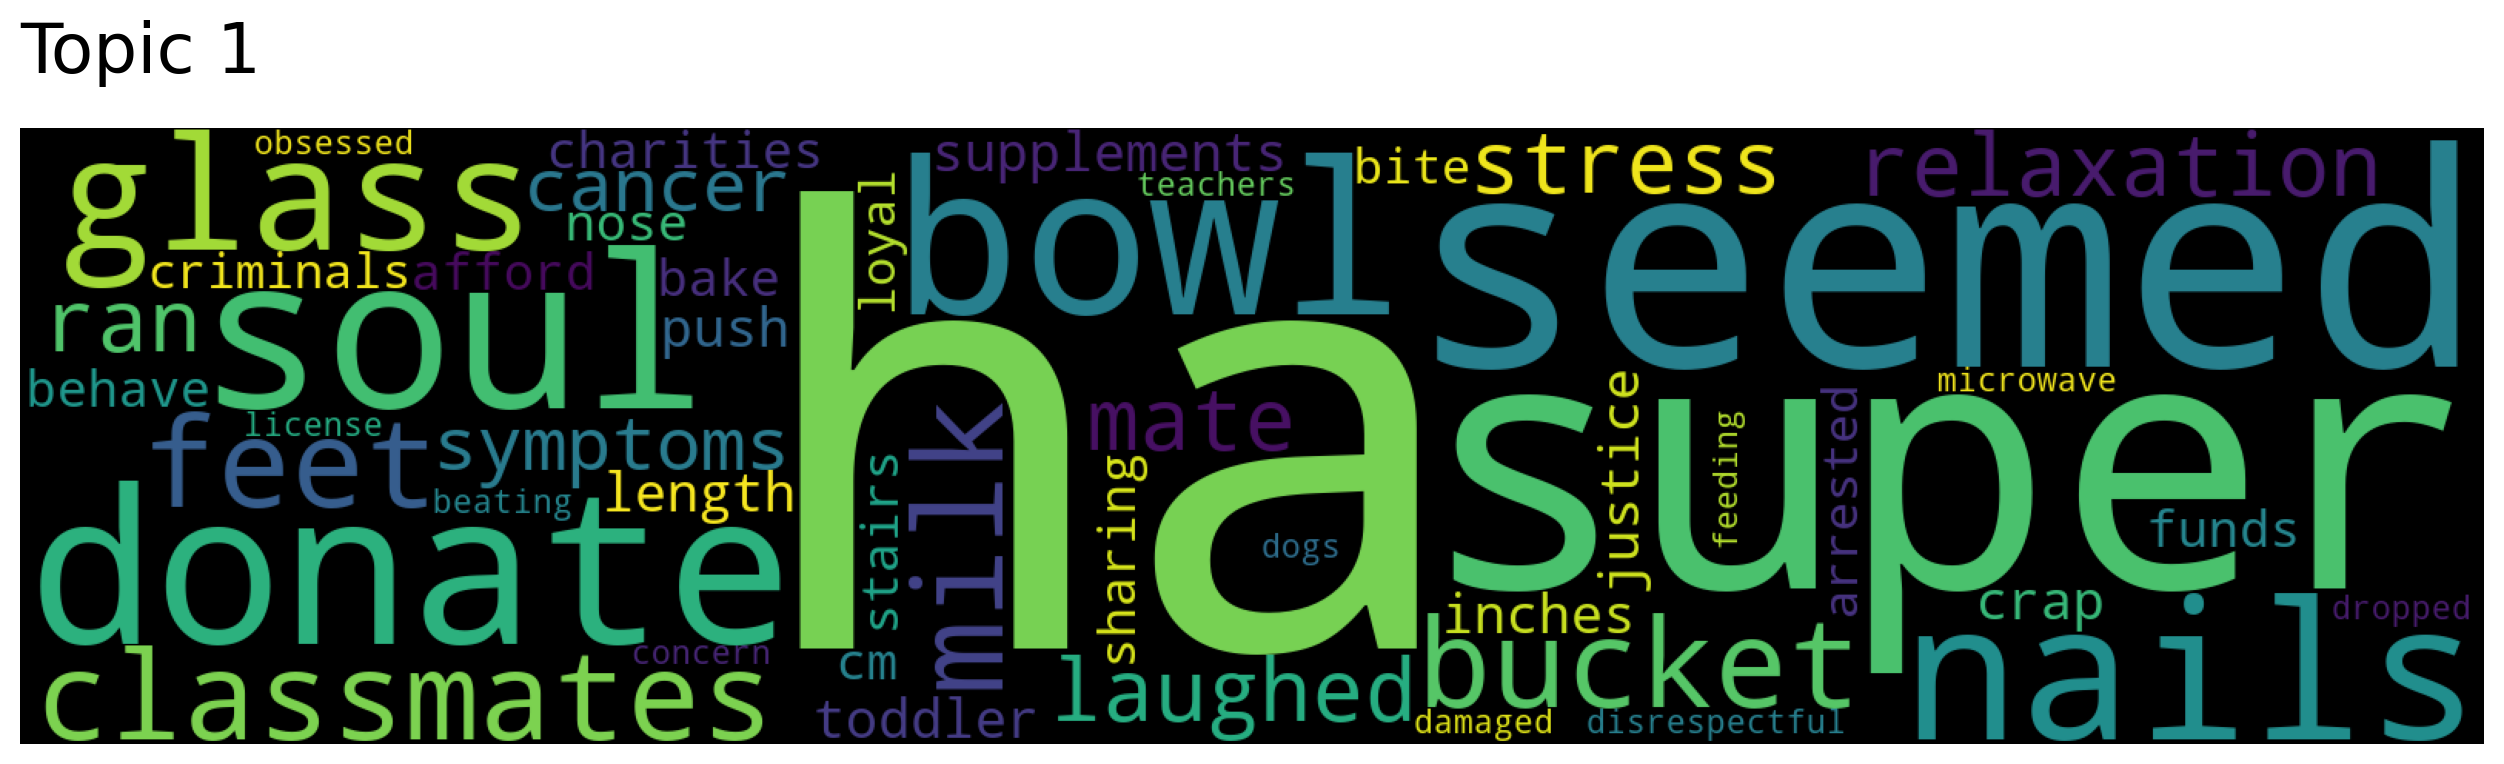

In [31]:
model.generate_topic_wordcloud(1)

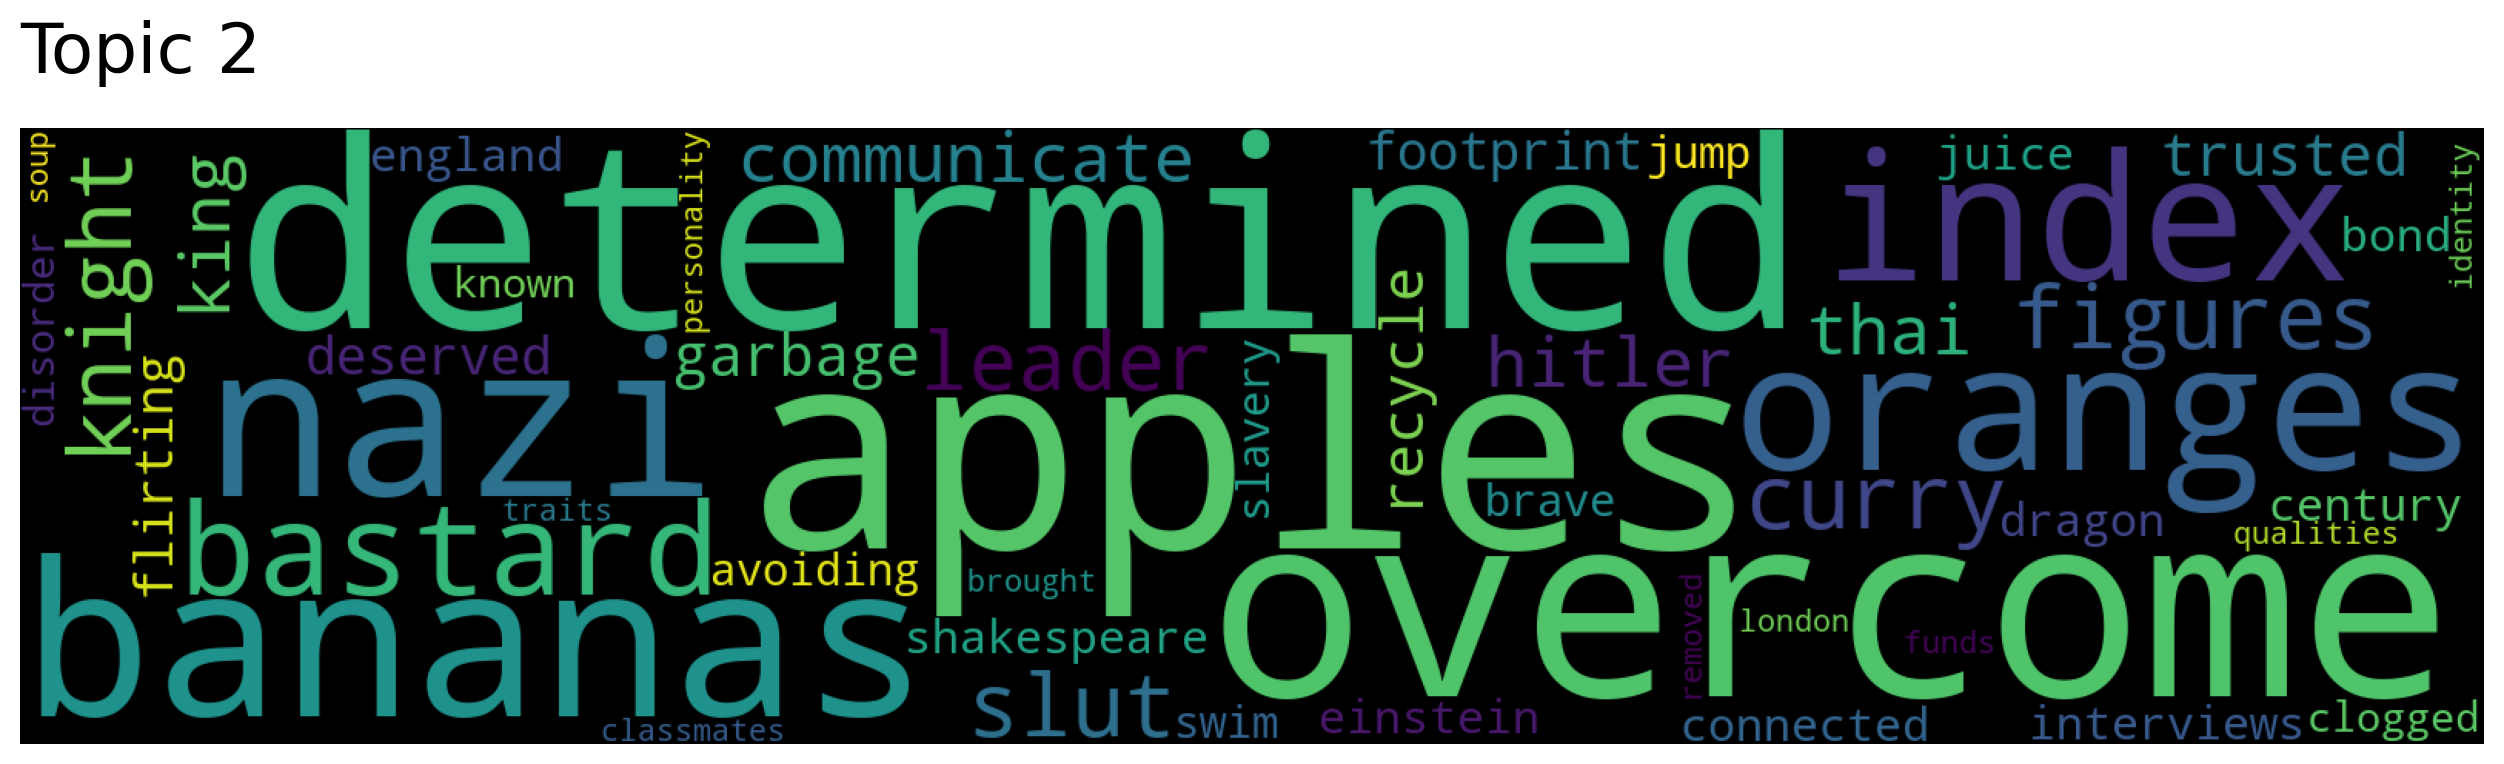

In [32]:
model.generate_topic_wordcloud(2)

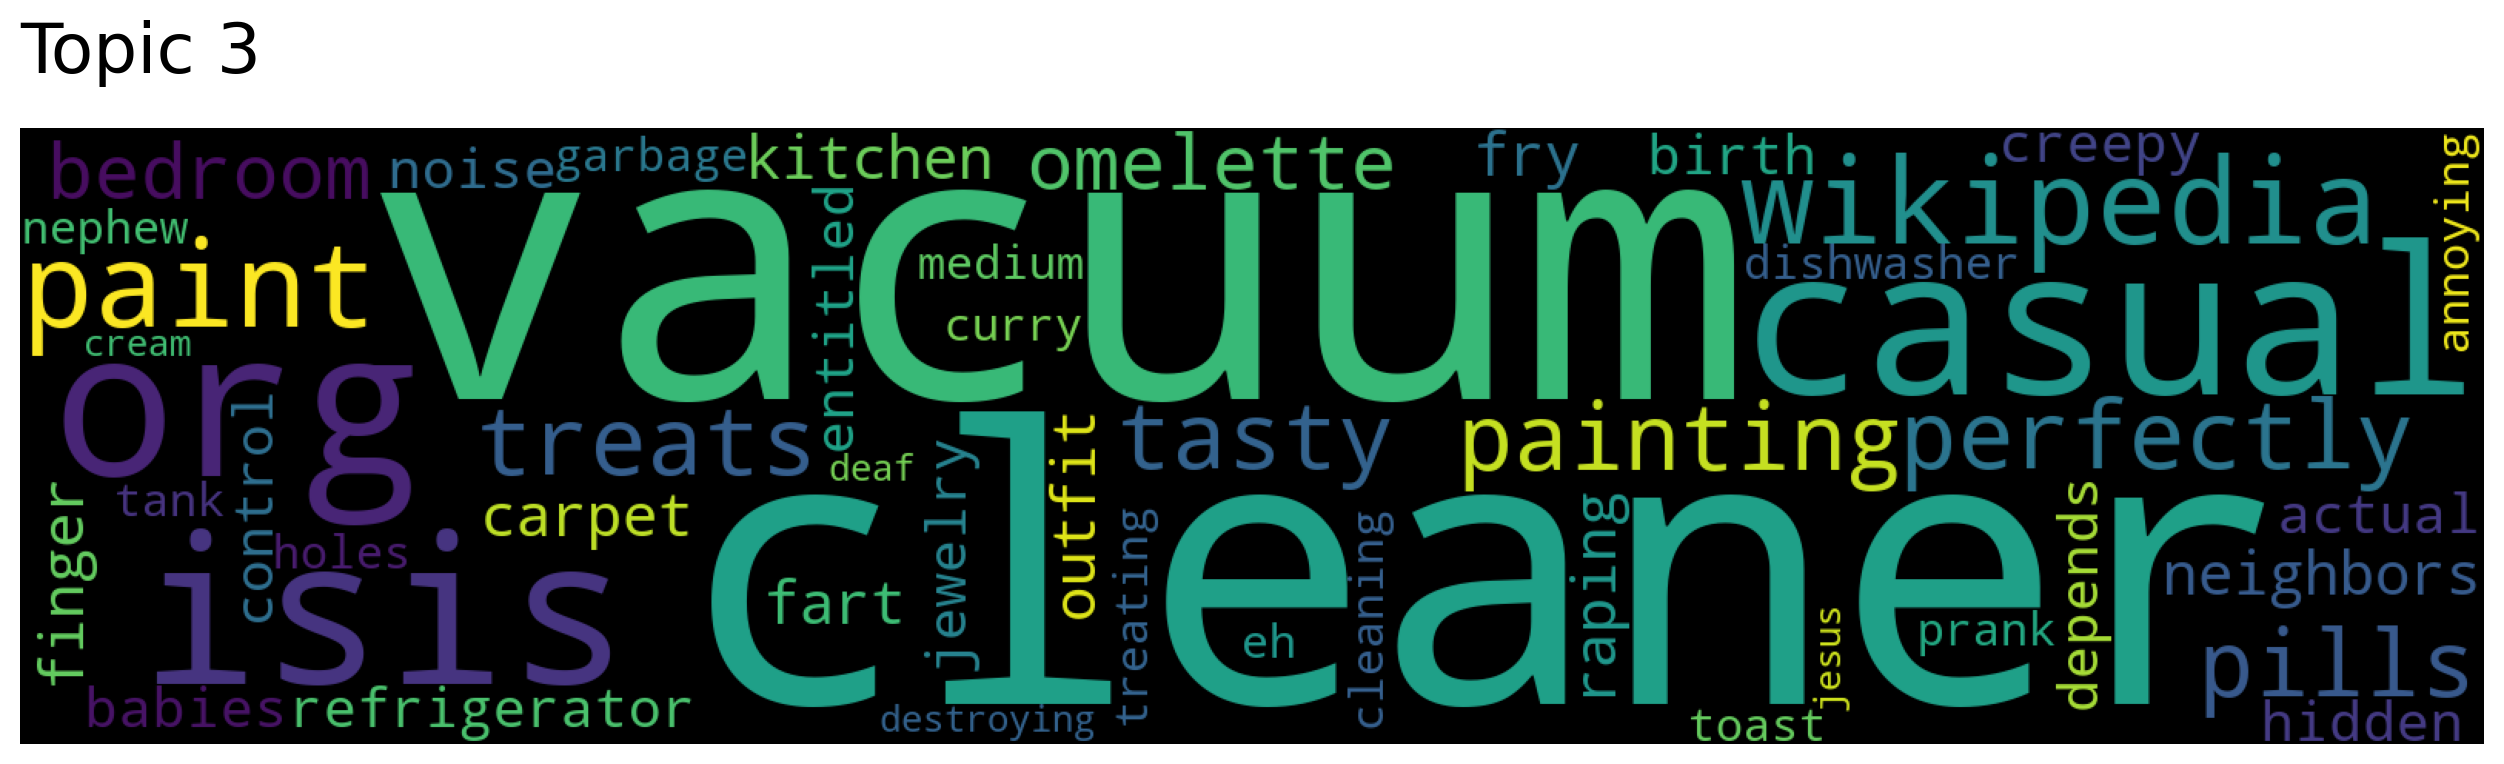

In [33]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [14]:
model.search_documents_by_topic(topic_num=3, num_docs=5)

(array(['He treats me nicely and I like him.',
        'Are incense sticks harmful?', 'Are incense sticks harmful?',
        "I'm fed up with a grieving friend",
        'They are incredibly loud and obnoxious.'], dtype=object),
 array([0.7512479 , 0.7444486 , 0.74128866, 0.738986  , 0.73849493],
       dtype=float32),
 array([ 33261,  27681, 194684, 122720, 249252]))

Using the wordclouds, model.search_documents_by_topic, model.topic_words

**Give a 2-4 word summary for each of the the top four topics** ⭕

Your answers here: 

Topic 0: Jobs and Events

Topic 1: Mental/Emotion Expression

Topic 2: People and Fruits

Topic 3: Home activities and items
